<div style="background-color: #eee3d3">
<h1> 4-normalisation_scaling.ipynb </h1>
</div>

# Normalization and scaling

---

### The purpose of this notebook is to use different methods to normalise the data in our peak table :
- Maximum absolute feature scaling
- Min-max feature normalisation
- Min-max sample scaling
- z-score : standard scaler
- Log transformation
- ...

---

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np

In [2]:
import sys
sys.path.append('/home/vincentm/MLnotebooks/metabopipeline_notebooks/bin/')

from normalisation_scaling_functions import *

## Import data

We import the peak table we inputed with the KNN method in the previous notebook

In [3]:
# path_peakTable = input('Enter absolute path to the peak table csv file : ')
# /home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/imputed_peak_tables/
path_peakTable = '/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/imputed_peak_tables/X_KNN_features.csv'

X_KNN = pd.read_csv(path_peakTable, sep=',', decimal='.', na_values='NA')
X_KNN

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,12.537659,15.145423,14.034654,17.953780,12.654495,15.907714,...,13.020365,12.928643,13.697314,12.967661,12.604052,12.203777,13.334666,12.208084,13.070165,12.876716
2,19.116076,15.446714,22.152604,16.410827,12.440713,14.628890,15.316772,17.404715,12.786407,15.947176,...,12.577257,12.292346,13.189135,13.330175,12.127478,11.975524,14.215988,12.165767,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,12.545616,16.371211,...,12.704279,12.443420,13.086805,13.304171,12.178640,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,12.691802,12.322645,13.224206,13.306722,12.349830,11.926237,14.192775,12.140768,13.006556,13.841201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,15.027154,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,...,12.349299,11.505004,13.189121,12.747049,12.247910,11.912734,13.136032,12.446722,12.644202,12.858457
182,19.301954,14.839941,21.085175,15.321075,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,...,12.909283,12.642143,12.734136,12.326991,12.708850,12.462751,12.175110,12.635066,12.638913,12.245303
183,19.170626,14.291711,21.381912,15.197205,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,...,12.846355,13.243400,12.876812,12.821974,12.199647,12.091641,12.298698,12.258149,12.664515,12.606517
184,18.869505,14.440576,20.961485,14.829978,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,...,12.477753,11.789382,13.107483,12.631348,11.628154,11.953155,13.200002,12.184695,12.603922,12.858066


In [4]:
print_stats(X_KNN)

----------X.min().mean()----------
 13.313619522850594 

----------X.max().mean()----------
 16.653242263385987 

----------X.mean().mean()---------
 14.92672861973582 

----------X.std().mean()----------
 0.5848993250433492 



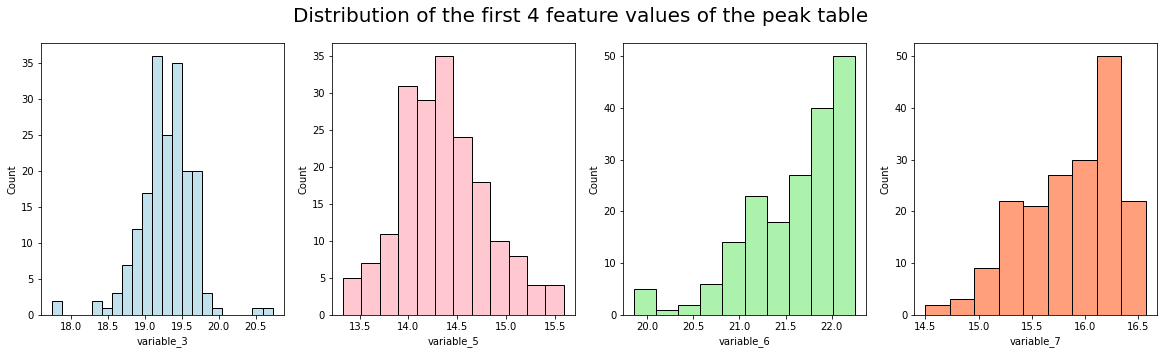

In [5]:
plot_first_distributions_metabolites(X_KNN)

We can see that the values can be in a different range according to the feature. For further analysis, it would be better to apply a few transformation on our peak table :
- a normalisation (for example a StandardScaler) on each feature to have a mean value of 0 et a std of 1
- a scaling (for example with Normalizer) on each samples to have a vector norm equal to 1

This will allow to compare with an equal weight all to features and all the samples.

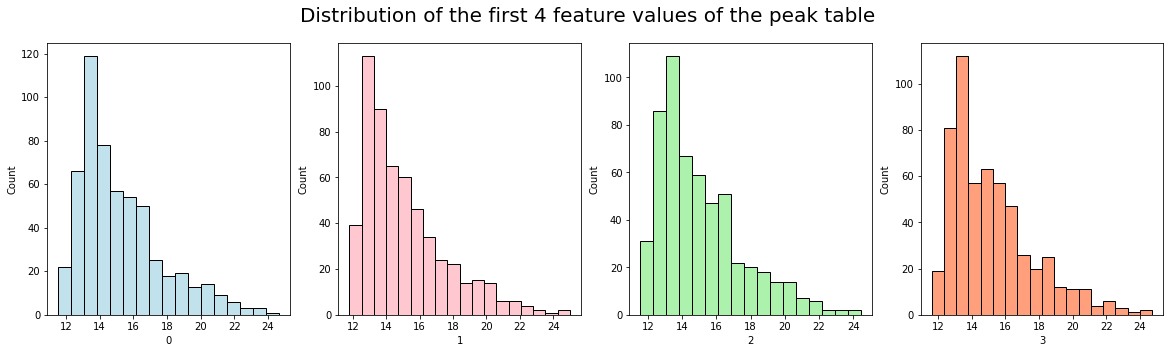

In [6]:
plot_first_distributions_samples(X_KNN)

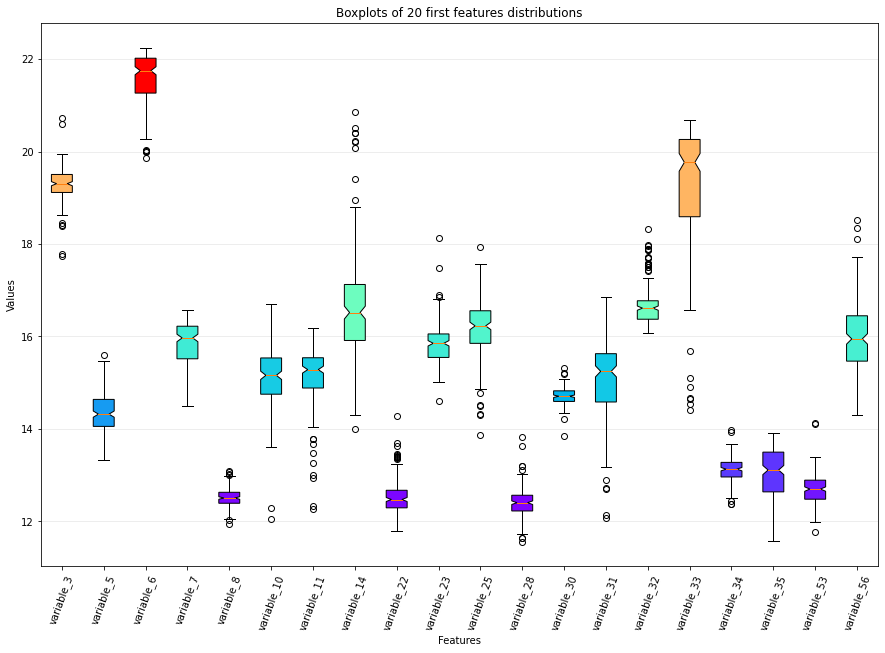

In [7]:
boxplot_first_distributions_metabolites(X_KNN, n=20)

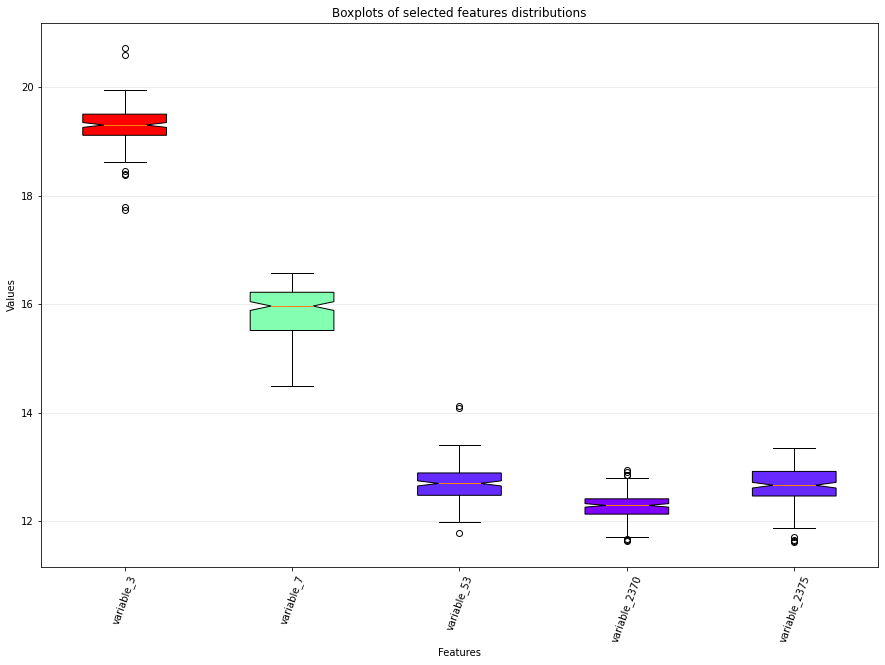

In [15]:
boxplot_first_distributions_metabolites(X_KNN, list_features=['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375'])

# Transformation methods

Inspired by [this link](https://www.statology.org/transform-data-in-python/), we can transform our data to make it more normally distributed, with one of these three methods, for each column y :
- __loge__ : Log Transformation (base-e log i.e. natural log) : $log_e(y)$
- __log2__ : Log Transformation (base-2 log) : $log_{2}(y)$
- __log10__ : Log Transformation (base-10 log) : $log_{10}(y)$
- __sqrt__ : Square Root Transformation : $\sqrt y$
- __cbrt__ : Cube Root Transformation : $^3\sqrt y$


## Based-e log

In [16]:
normPeakTable(X_KNN, 'loge', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,2.983750,2.683473,3.099443,2.798180,2.534898,2.746027,2.765151,2.862252,2.548890,2.821712,...,2.489252,2.531205,2.579675,2.582544,2.505411,2.494389,2.658107,2.514062,2.573702,2.630631
1,2.982408,2.720861,3.036462,2.711546,2.528737,2.717698,2.641530,2.887801,2.538013,2.766804,...,2.566515,2.559445,2.617200,2.562459,2.534018,2.501745,2.590367,2.502098,2.570332,2.555421
2,2.950530,2.737396,3.097955,2.797941,2.520974,2.682998,2.728948,2.856741,2.548383,2.769282,...,2.531890,2.508977,2.579393,2.590030,2.495474,2.482865,2.654367,2.498626,2.561529,2.623102
3,2.964080,2.738290,3.098712,2.797523,2.543236,2.768654,2.770571,2.762346,2.529371,2.795524,...,2.541939,2.521192,2.571604,2.588078,2.499684,2.451466,2.659150,2.511152,2.569423,2.625598
4,2.973279,2.675220,3.097849,2.795586,2.510738,2.704725,2.727520,2.810015,2.502588,2.783267,...,2.540956,2.511439,2.582049,2.588269,2.513642,2.478741,2.652733,2.496569,2.565454,2.627650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.978839,2.670546,3.035362,2.709859,2.537525,2.695097,2.656400,2.840632,2.491610,2.733612,...,2.513599,2.442782,2.579392,2.545300,2.505355,2.477608,2.575359,2.521457,2.537199,2.554002
182,2.960206,2.697322,3.048570,2.729229,2.526582,2.673331,2.718871,2.822366,2.521933,2.801811,...,2.557947,2.537036,2.544286,2.511791,2.542299,2.522744,2.499394,2.536476,2.536780,2.505142
183,2.953379,2.659680,3.062545,2.721112,2.525693,2.669653,2.675565,2.792139,2.550103,2.748121,...,2.553060,2.583499,2.555428,2.551160,2.501407,2.492514,2.509493,2.506191,2.538804,2.534214
184,2.937547,2.670042,3.042687,2.696651,2.510602,2.647172,2.622954,2.779447,2.539034,2.773924,...,2.523947,2.467199,2.573183,2.536182,2.453429,2.480995,2.580217,2.500181,2.534008,2.553971


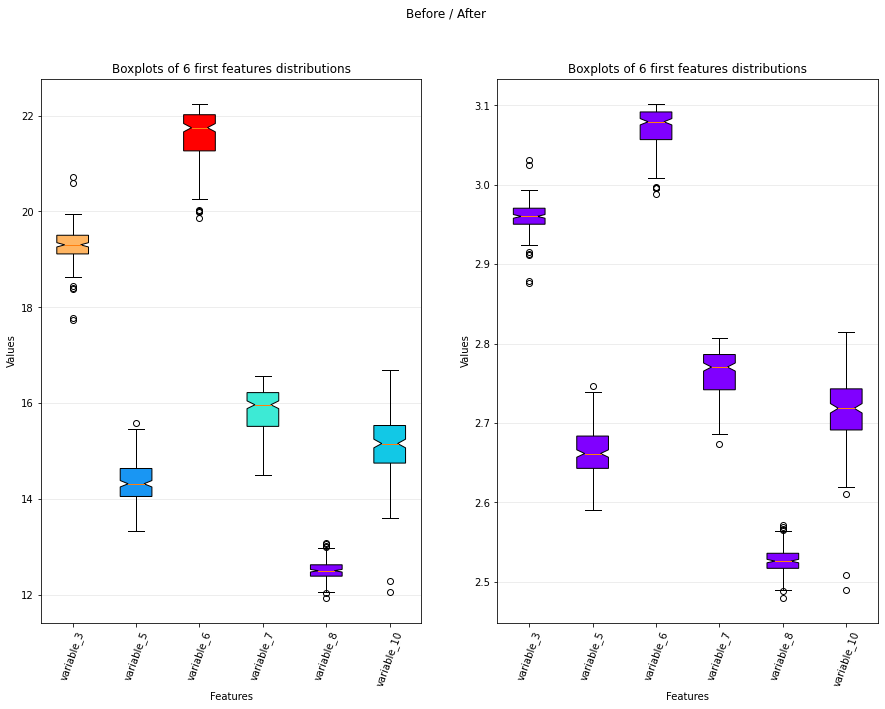

In [24]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'loge', based='metabolite'), n=6)

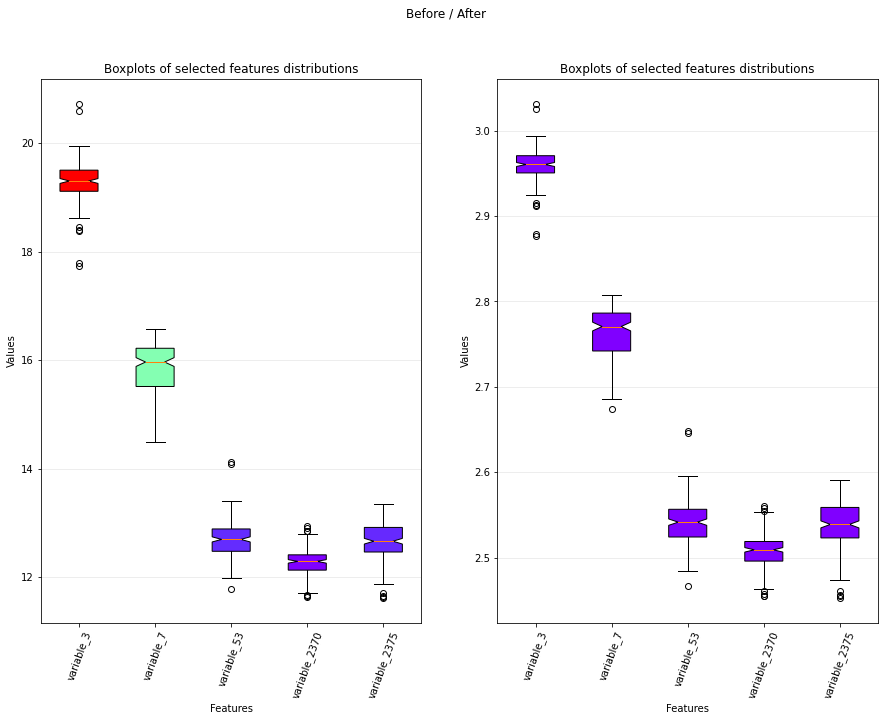

In [25]:
list_features = ['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375']
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'loge', based='metabolite'), list_features=list_features)

## Based-2 log

In [26]:
normPeakTable(X_KNN, 'log2', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.304641,3.871433,4.471551,4.036920,3.657085,3.961679,3.989270,4.129357,3.677271,4.070870,...,3.591231,3.651757,3.721684,3.725823,3.614544,3.598643,3.834838,3.627025,3.713068,3.795198
1,4.302705,3.925373,4.380689,3.911934,3.648196,3.920810,3.810922,4.166216,3.661578,3.991655,...,3.702698,3.692499,3.775821,3.696846,3.655816,3.609256,3.737110,3.609765,3.708206,3.686693
2,4.256715,3.949228,4.469404,4.036576,3.636997,3.870748,3.937040,4.121406,3.676539,3.995229,...,3.652745,3.619688,3.721278,3.736624,3.600208,3.582017,3.829442,3.604755,3.695506,3.784336
3,4.276264,3.950517,4.470497,4.035973,3.669114,3.994323,3.997089,3.985223,3.649111,4.033089,...,3.667243,3.637311,3.710041,3.733807,3.606281,3.536719,3.836343,3.622827,3.706894,3.787937
4,4.289535,3.859526,4.469251,4.033178,3.622230,3.902093,3.934979,4.053995,3.610471,4.015405,...,3.665825,3.623240,3.725109,3.734083,3.626419,3.576067,3.827085,3.601788,3.701167,3.790897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.297557,3.852784,4.379101,3.909500,3.660875,3.888203,3.832375,4.098165,3.594633,3.943769,...,3.626357,3.524190,3.721277,3.672091,3.614464,3.574433,3.715458,3.637694,3.660404,3.684646
182,4.270675,3.891413,4.398157,3.937446,3.645087,3.856801,3.922502,4.071813,3.638380,4.042159,...,3.690337,3.660169,3.670629,3.623749,3.667762,3.639551,3.605863,3.659361,3.659800,3.614157
183,4.260826,3.837107,4.418319,3.925734,3.643805,3.851495,3.860025,4.028206,3.679020,3.964700,...,3.683287,3.727202,3.686704,3.680546,3.608767,3.595938,3.620434,3.615669,3.662720,3.656098
184,4.237985,3.852056,4.389669,3.890445,3.622033,3.819063,3.784123,4.009895,3.663052,4.001926,...,3.641286,3.559416,3.712319,3.658937,3.539550,3.579320,3.722466,3.606998,3.655801,3.684602


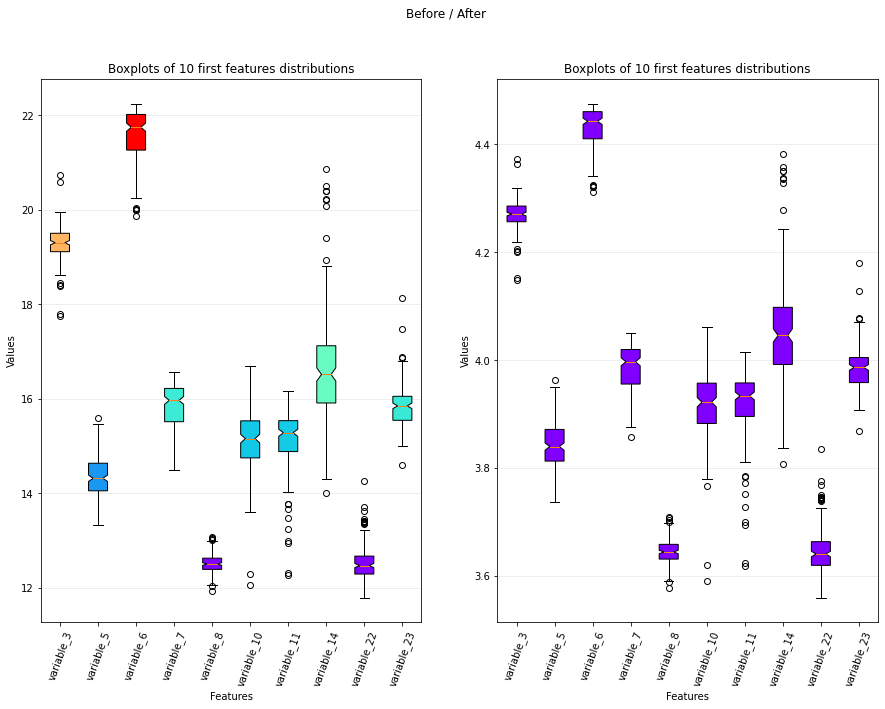

In [29]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'log2', based='metabolite'))

## Based-10 log

In [30]:
normPeakTable(X_KNN, 'log10', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,1.295826,1.165417,1.346071,1.215234,1.100892,1.192584,1.200890,1.243060,1.106969,1.225454,...,1.081068,1.099289,1.120339,1.121585,1.088086,1.083299,1.154401,1.091843,1.117745,1.142469
1,1.295243,1.181655,1.318719,1.177610,1.098216,1.180281,1.147202,1.254156,1.102245,1.201608,...,1.114623,1.111553,1.136635,1.112862,1.100510,1.086494,1.124982,1.086648,1.116281,1.109805
2,1.281399,1.188836,1.345425,1.215130,1.094845,1.165211,1.185167,1.240667,1.106749,1.202684,...,1.099586,1.089635,1.120216,1.124836,1.083771,1.078295,1.152777,1.085139,1.112458,1.139199
3,1.287284,1.189224,1.345754,1.214949,1.104513,1.202411,1.203244,1.199672,1.098492,1.214081,...,1.103950,1.094940,1.116834,1.123988,1.085599,1.064658,1.154854,1.090580,1.115886,1.140283
4,1.291279,1.161833,1.345379,1.214108,1.090400,1.174647,1.184547,1.220374,1.086860,1.208757,...,1.103523,1.090704,1.121370,1.124071,1.091661,1.076503,1.152067,1.084246,1.114162,1.141174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.293693,1.159803,1.318241,1.176877,1.102033,1.170466,1.153660,1.233671,1.082092,1.187193,...,1.091642,1.060887,1.120216,1.105410,1.088062,1.076011,1.118464,1.095055,1.101891,1.109189
182,1.285601,1.171432,1.323977,1.185289,1.097281,1.161013,1.180791,1.225738,1.095262,1.216811,...,1.110902,1.101821,1.104969,1.090857,1.104106,1.095614,1.085473,1.101578,1.101710,1.087970
183,1.282636,1.155084,1.330047,1.181764,1.096895,1.159416,1.161983,1.212611,1.107495,1.193494,...,1.108780,1.121999,1.109808,1.107955,1.086347,1.082485,1.089859,1.088425,1.102589,1.100595
184,1.275761,1.159585,1.321422,1.171141,1.090341,1.149652,1.139134,1.207099,1.102688,1.204700,...,1.096136,1.071491,1.117519,1.101450,1.065511,1.077483,1.120574,1.085815,1.100506,1.109176


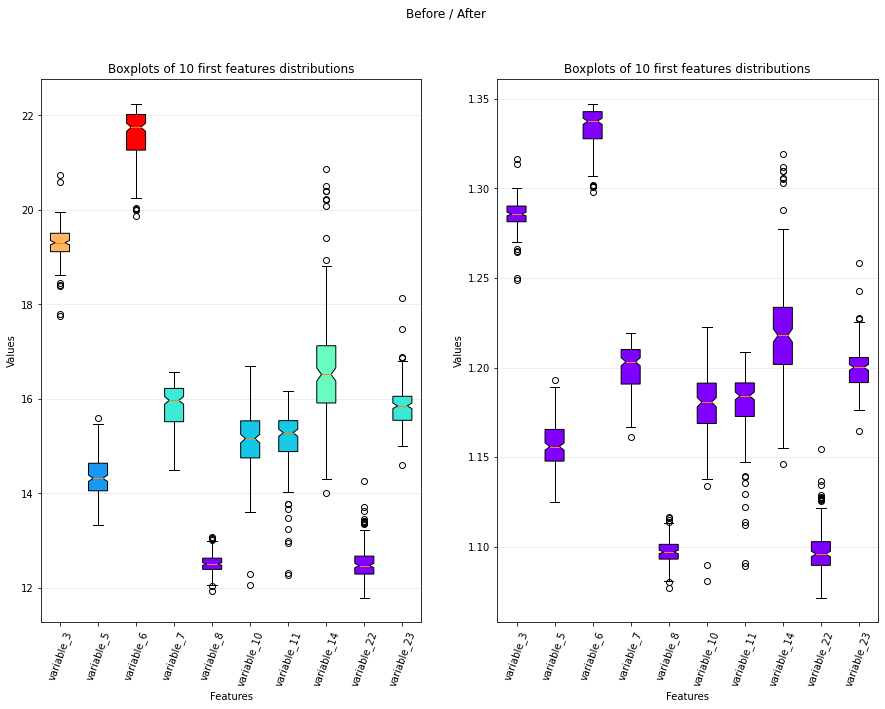

In [31]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'log10', based='metabolite'))

## Square root

In [32]:
normPeakTable(X_KNN, 'sqrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.445423,3.825681,4.710157,4.051511,3.551780,3.947227,3.985152,4.183408,3.576715,4.099464,...,3.471635,3.545229,3.632196,3.637410,3.499799,3.480564,3.777467,3.514970,3.621366,3.725926
1,4.442441,3.897871,4.564144,3.879759,3.540856,3.891712,3.746285,4.237190,3.557316,3.988448,...,3.608374,3.595642,3.700988,3.601064,3.550219,3.493390,3.651666,3.494007,3.615268,3.588414
2,4.372194,3.930231,4.706655,4.051028,3.527140,3.824773,3.913665,4.171896,3.575809,3.993392,...,3.546443,3.506044,3.631685,3.651051,3.482453,3.460567,3.770410,3.487946,3.599391,3.711926
3,4.401917,3.931987,4.708438,4.050181,3.566618,3.992138,3.995967,3.979567,3.541979,4.046135,...,3.564306,3.527523,3.617569,3.647488,3.489791,3.406663,3.779438,3.509860,3.613625,3.716561
4,4.422210,3.809926,4.706405,4.046260,3.509134,3.866549,3.910870,4.075558,3.494862,4.021413,...,3.562556,3.510363,3.636510,3.647838,3.514233,3.453438,3.767330,3.484361,3.606460,3.720376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.434521,3.801034,4.561634,3.876487,3.556449,3.847980,3.774244,4.138427,3.475732,3.922802,...,3.514157,3.391903,3.631683,3.570301,3.499701,3.451483,3.624366,3.527991,3.555869,3.585869
182,4.393399,3.852264,4.591860,3.914214,3.537042,3.806330,3.893995,4.100804,3.528830,4.058874,...,3.592949,3.555579,3.568492,3.510982,3.564947,3.530262,3.489285,3.554584,3.555125,3.499329
183,4.378427,3.780438,4.624058,3.898359,3.535471,3.799337,3.810585,4.039293,3.578885,3.951362,...,3.584181,3.639148,3.588427,3.580778,3.492799,3.477304,3.506950,3.501164,3.558724,3.550566
184,4.343904,3.800076,4.578371,3.850971,3.508894,3.756870,3.711652,4.013741,3.559133,4.002671,...,3.532386,3.433567,3.620426,3.554061,3.410008,3.457334,3.633181,3.490658,3.550200,3.585814


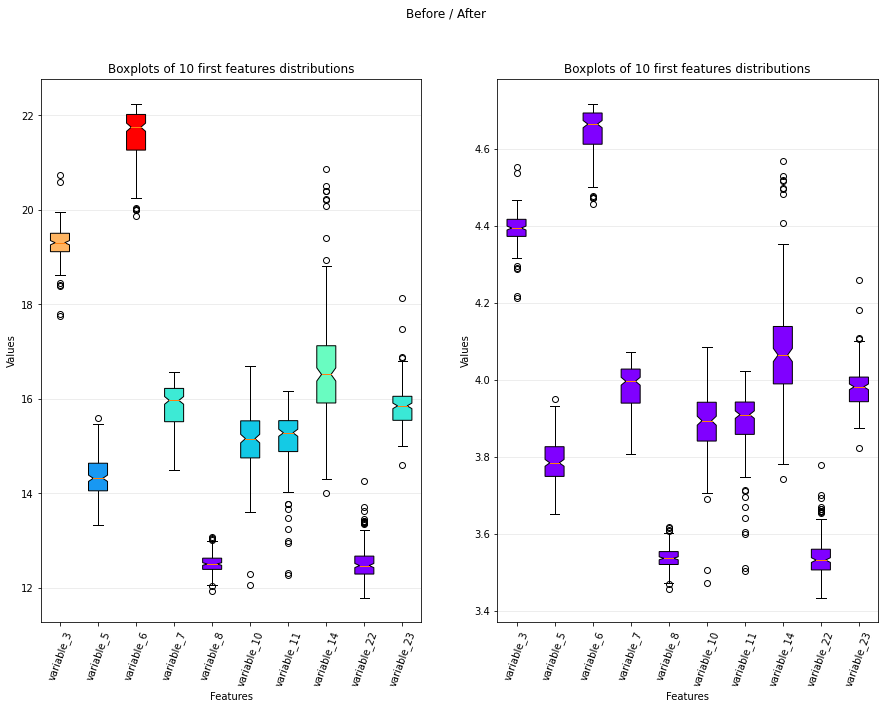

In [33]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'sqrt', based='metabolite'))

## Cubic root

In [34]:
normPeakTable(X_KNN, 'cbrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,2.703598,2.446090,2.809896,2.541429,2.327899,2.497630,2.513603,2.596291,2.338781,2.561443,...,2.292747,2.325035,2.362905,2.365165,2.305130,2.296676,2.425495,2.311787,2.358205,2.403382
1,2.702388,2.476766,2.751522,2.469088,2.323123,2.474156,2.412129,2.618496,2.330317,2.514988,...,2.352562,2.347025,2.392646,2.349383,2.327216,2.302315,2.371341,2.302586,2.355557,2.343878
2,2.673825,2.490455,2.808503,2.541227,2.317119,2.445703,2.483452,2.591526,2.338386,2.517066,...,2.325566,2.307871,2.362683,2.371075,2.297507,2.287871,2.422473,2.299922,2.348656,2.397358
3,2.685929,2.491197,2.809212,2.540873,2.334378,2.516539,2.518148,2.511254,2.323614,2.539181,...,2.333369,2.317288,2.356557,2.369532,2.300733,2.264051,2.426339,2.309546,2.354843,2.399353
4,2.694178,2.439370,2.808404,2.539233,2.309227,2.463480,2.482270,2.551475,2.302961,2.528827,...,2.332604,2.309766,2.364775,2.369684,2.311463,2.284728,2.421154,2.298346,2.351730,2.400995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.699176,2.435573,2.750512,2.467699,2.329938,2.455586,2.424115,2.577648,2.294550,2.487316,...,2.311430,2.257506,2.362682,2.335984,2.305087,2.283865,2.359508,2.317492,2.329685,2.342770
182,2.682463,2.457409,2.762649,2.483684,2.321455,2.437835,2.475124,2.562001,2.317860,2.544507,...,2.345853,2.329558,2.335195,2.310037,2.333648,2.318487,2.300511,2.329123,2.329360,2.304924
183,2.676366,2.426767,2.775549,2.476973,2.320767,2.434848,2.439651,2.536317,2.339727,2.499374,...,2.342035,2.365919,2.343884,2.340552,2.302055,2.295242,2.308269,2.305729,2.330932,2.327368
184,2.662279,2.435164,2.757236,2.456859,2.309122,2.416671,2.397240,2.525610,2.331110,2.520964,...,2.319417,2.275955,2.357797,2.328895,2.265532,2.286446,2.363332,2.301114,2.327208,2.342746


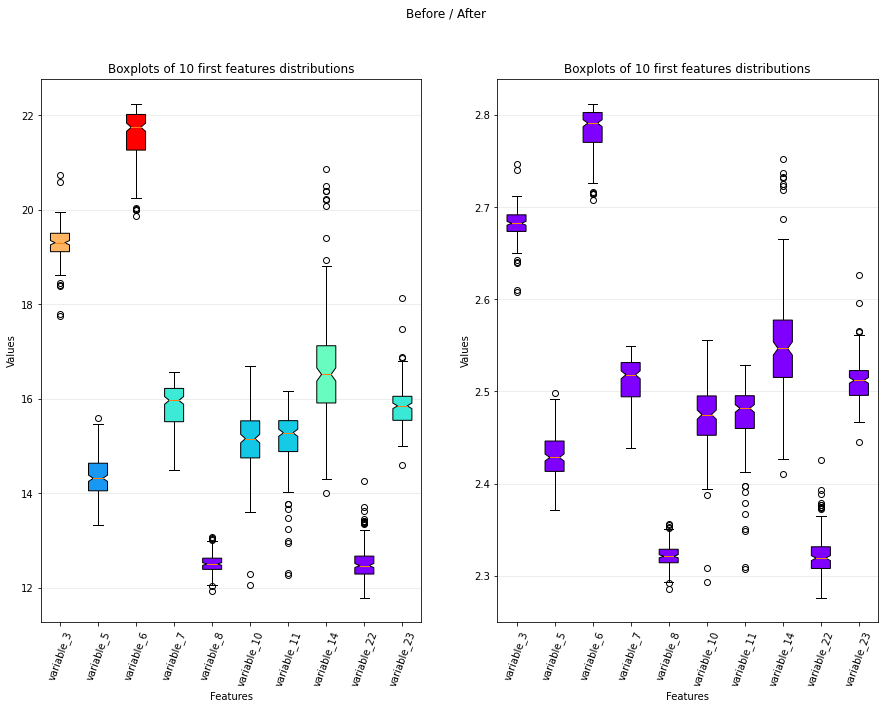

In [35]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'cbrt', based='metabolite'))

# Metabolite-based Scaling Methods

At this point, we want to normalise our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

## Range scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

In [36]:
normPeakTable(X_KNN, 'range_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.675871,0.577259,0.973476,0.924485,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,...,0.177592,0.594254,0.474021,0.817463,0.535128,0.475982,0.959044,0.550078,0.865513,0.930305
1,0.666985,0.823965,0.406441,0.267175,0.524923,0.666295,0.451298,0.576482,0.348543,0.368954,...,0.689789,0.795382,0.623853,0.677427,0.801534,0.556608,0.573598,0.437001,0.839954,0.493141
2,0.459405,0.936051,0.959667,0.922595,0.439997,0.555052,0.779922,0.496310,0.401776,0.380174,...,0.455355,0.439885,0.472918,0.870383,0.444360,0.350868,0.937075,0.404435,0.773600,0.885047
3,0.546835,0.942163,0.966695,0.919283,0.685329,0.836809,0.946776,0.267393,0.304605,0.500733,...,0.522558,0.524290,0.442525,0.856542,0.482704,0.017208,0.965185,0.522451,0.833072,0.900012
4,0.606863,0.524031,0.958681,0.903965,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,...,0.515957,0.456813,0.483335,0.857900,0.611004,0.306443,0.927501,0.385196,0.803107,0.912343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.254929,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,...,0.334750,0.000000,0.472914,0.560002,0.534619,0.294271,0.491678,0.620652,0.593209,0.485204
182,0.521718,0.667571,0.512699,0.396755,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,...,0.631019,0.635316,0.337778,0.336417,0.880076,0.790039,0.095373,0.765597,0.590145,0.218704
183,0.477692,0.424994,0.636953,0.336984,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,...,0.597726,0.971236,0.380155,0.599882,0.498448,0.455533,0.146343,0.475530,0.604975,0.375701
184,0.376745,0.490863,0.460906,0.159786,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,...,0.402711,0.158881,0.448666,0.498418,0.070135,0.330706,0.518060,0.419001,0.569876,0.485034


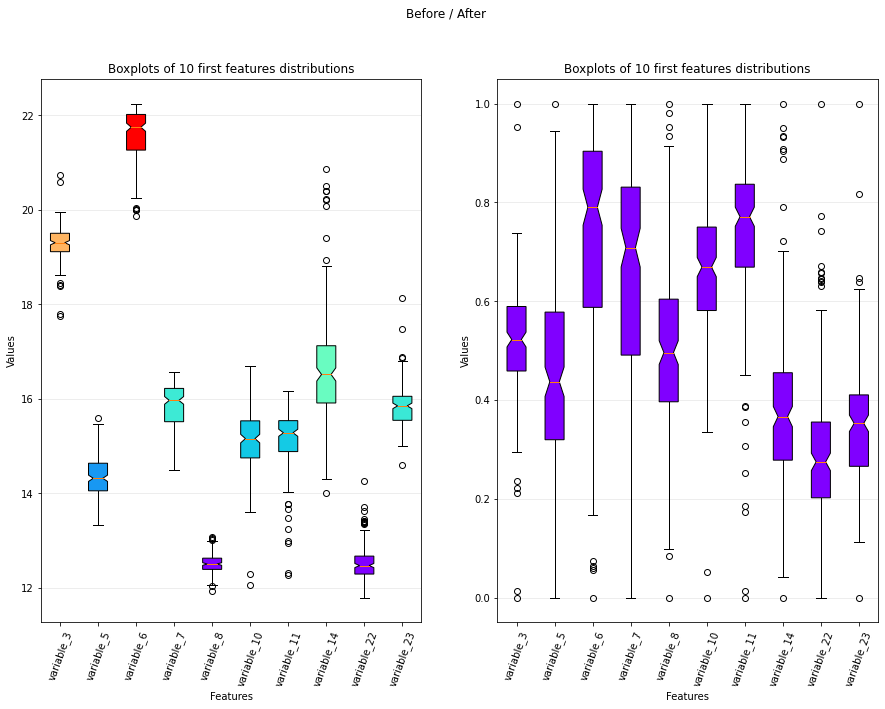

In [37]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'range_scaling', based='metabolite'))

## Mini-max scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

_Use <code>MinMaxScaler()</code> function from <code>scikitlearn</code> package_

In [38]:
normPeakTable(X_KNN, 'minmax_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.675871,0.577259,0.973476,0.924485,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,...,0.177592,0.594254,0.474021,0.817463,0.535128,0.475982,0.959044,0.550078,0.865513,0.930305
1,0.666985,0.823965,0.406441,0.267175,0.524923,0.666295,0.451298,0.576482,0.348543,0.368954,...,0.689789,0.795382,0.623853,0.677427,0.801534,0.556608,0.573598,0.437001,0.839954,0.493141
2,0.459405,0.936051,0.959667,0.922595,0.439997,0.555052,0.779922,0.496310,0.401776,0.380174,...,0.455355,0.439885,0.472918,0.870383,0.444360,0.350868,0.937075,0.404435,0.773600,0.885047
3,0.546835,0.942163,0.966695,0.919283,0.685329,0.836809,0.946776,0.267393,0.304605,0.500733,...,0.522558,0.524290,0.442525,0.856542,0.482704,0.017208,0.965185,0.522451,0.833072,0.900012
4,0.606863,0.524031,0.958681,0.903965,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,...,0.515957,0.456813,0.483335,0.857900,0.611004,0.306443,0.927501,0.385196,0.803107,0.912343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.254929,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,...,0.334750,0.000000,0.472914,0.560002,0.534619,0.294271,0.491678,0.620652,0.593209,0.485204
182,0.521718,0.667571,0.512699,0.396755,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,...,0.631019,0.635316,0.337778,0.336417,0.880076,0.790039,0.095373,0.765597,0.590145,0.218704
183,0.477692,0.424994,0.636953,0.336984,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,...,0.597726,0.971236,0.380155,0.599882,0.498448,0.455533,0.146343,0.475530,0.604975,0.375701
184,0.376745,0.490863,0.460906,0.159786,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,...,0.402711,0.158881,0.448666,0.498418,0.070135,0.330706,0.518060,0.419001,0.569876,0.485034


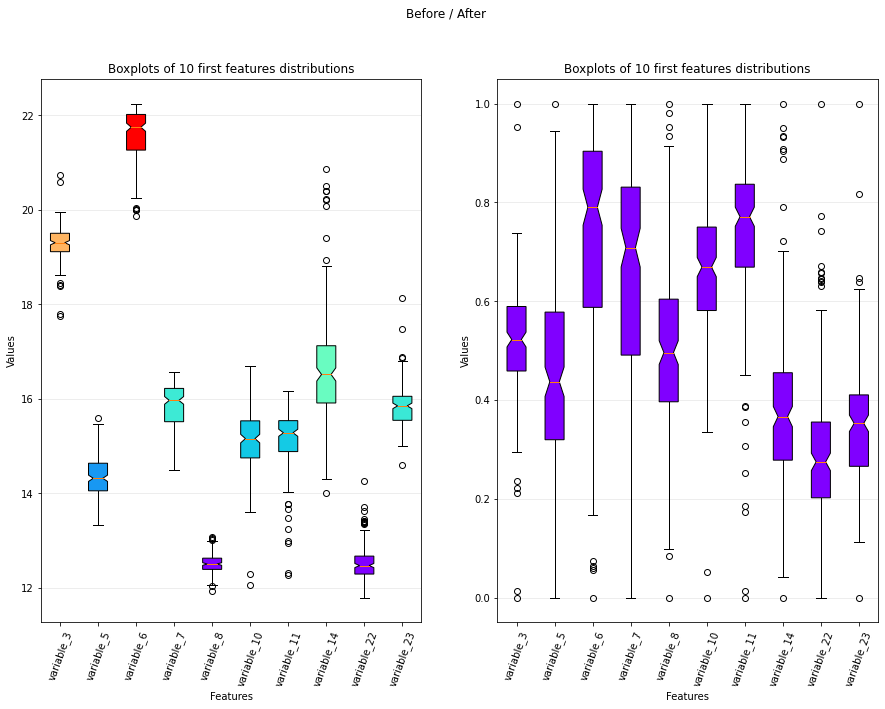

In [39]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'minmax_scaling', based='metabolite'))

## Maximum absolute scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
\end{eqnarray}

In [40]:
normPeakTable(X_KNN, 'max_abs_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.953356,0.938722,0.997153,0.990556,0.964462,0.933255,0.981826,0.839199,0.896563,0.927091,...,0.885759,0.945375,0.881654,0.974735,0.951800,0.954208,0.993089,0.954818,0.982604,0.988581
1,0.952078,0.974483,0.936289,0.908353,0.958538,0.907188,0.867654,0.860915,0.886864,0.877558,...,0.956908,0.972452,0.915366,0.955353,0.979422,0.961254,0.928044,0.943463,0.979298,0.916957
2,0.922206,0.990730,0.995671,0.990320,0.951127,0.876249,0.946918,0.834587,0.896108,0.879735,...,0.924343,0.924592,0.881405,0.982060,0.942389,0.943275,0.989381,0.940193,0.970716,0.981166
3,0.934787,0.991616,0.996425,0.989906,0.972538,0.954612,0.987162,0.759410,0.879233,0.903127,...,0.933678,0.935956,0.874567,0.980144,0.946365,0.914118,0.994125,0.952044,0.978408,0.983618
4,0.943426,0.931006,0.995565,0.987990,0.941441,0.895495,0.945566,0.796487,0.855996,0.892125,...,0.932761,0.926871,0.883749,0.980332,0.959668,0.939393,0.987766,0.938261,0.974532,0.985638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.948686,0.926665,0.935259,0.906821,0.966999,0.886914,0.880653,0.821250,0.846651,0.848909,...,0.907590,0.865371,0.881404,0.939100,0.951748,0.938329,0.914220,0.961905,0.947383,0.915657
182,0.931173,0.951813,0.947694,0.924558,0.956475,0.867818,0.937423,0.806385,0.872717,0.908823,...,0.948745,0.950903,0.850999,0.908153,0.987566,0.981652,0.847344,0.976461,0.946986,0.871994
183,0.924837,0.916650,0.961031,0.917083,0.955625,0.864632,0.897694,0.782376,0.897651,0.861315,...,0.944120,0.996128,0.860533,0.944619,0.947997,0.952421,0.855945,0.947332,0.948905,0.897716
184,0.910310,0.926198,0.942135,0.894923,0.941312,0.845412,0.851686,0.772508,0.887770,0.883828,...,0.917030,0.886761,0.875949,0.930576,0.903588,0.941513,0.918672,0.941656,0.944365,0.915629


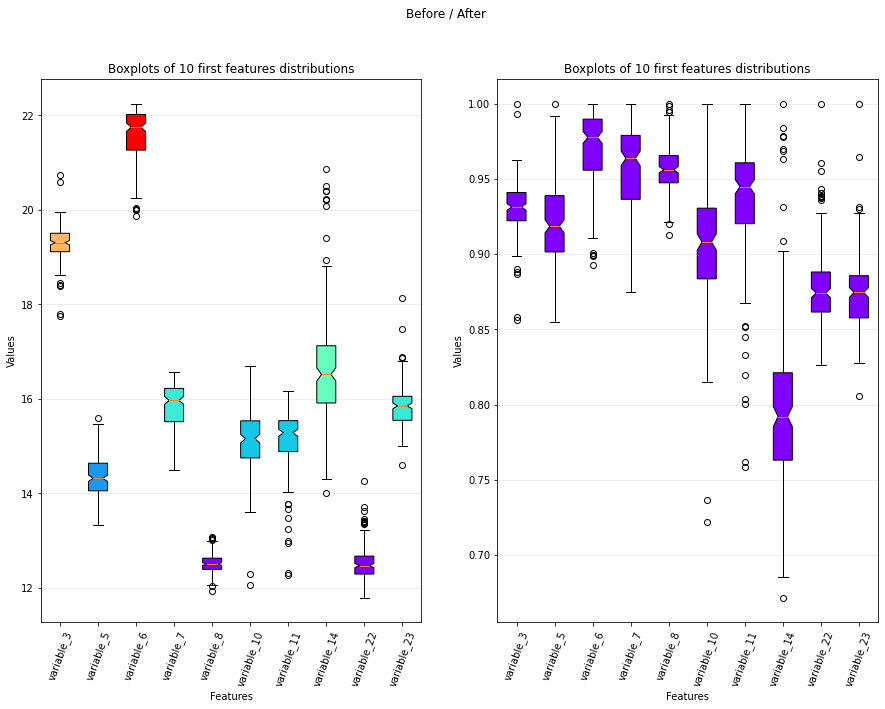

In [41]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'max_abs_scaling', based='metabolite'))

## Level scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
\end{eqnarray}

In [42]:
normPeakTable(X_KNN, 'level_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.024406,0.019462,0.027255,0.034668,0.008309,0.030199,0.048041,0.050359,0.022732,0.061204,...,-0.051969,0.008457,0.012107,0.034468,0.001769,0.001928,0.062366,0.005576,0.036397,0.058009
1,0.023032,0.058299,-0.035447,-0.051196,0.002116,0.001425,-0.073831,0.077539,0.011668,0.004506,...,0.024183,0.037341,0.050808,0.013898,0.030841,0.009325,-0.007216,-0.006383,0.032910,-0.018646
2,-0.009066,0.075944,0.025728,0.034421,-0.005633,-0.032729,0.010778,0.044586,0.022214,0.006998,...,-0.010672,-0.013713,0.011822,0.042241,-0.008136,-0.009552,0.058400,-0.009827,0.023857,0.050073
3,0.004453,0.076906,0.026506,0.033988,0.016751,0.053776,0.053737,-0.049507,0.002964,0.033774,...,-0.000680,-0.001591,0.003972,0.040208,-0.003952,-0.040168,0.063475,0.002654,0.031971,0.052697
4,0.013735,0.011083,0.025619,0.031987,-0.015760,-0.011483,0.009335,-0.003101,-0.023543,0.021180,...,-0.001662,-0.011282,0.014513,0.040408,0.010049,-0.013629,0.056672,-0.011862,0.027883,0.054859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.019388,0.006368,-0.036507,-0.052796,0.010961,-0.020955,-0.059956,0.027893,-0.034203,-0.028288,...,-0.028603,-0.076886,0.011821,-0.003351,0.001714,-0.014746,-0.022004,0.013040,-0.000753,-0.020037
182,0.000569,0.033679,-0.023697,-0.034269,-0.000042,-0.042035,0.000643,0.009288,-0.004469,0.040294,...,0.015445,0.014354,-0.023083,-0.036194,0.039412,0.030744,-0.093546,0.028369,-0.001171,-0.066766
183,-0.006238,-0.004508,-0.009957,-0.042077,-0.000930,-0.045551,-0.041766,-0.020763,0.023974,-0.014087,...,0.010495,0.062596,-0.012138,0.002507,-0.002234,0.000051,-0.084345,-0.002308,0.000852,-0.039238
184,-0.021848,0.005861,-0.029424,-0.065224,-0.015894,-0.066769,-0.090877,-0.033113,0.012702,0.011683,...,-0.018499,-0.054068,0.005558,-0.012397,-0.048974,-0.011402,-0.017241,-0.008287,-0.003936,-0.020067


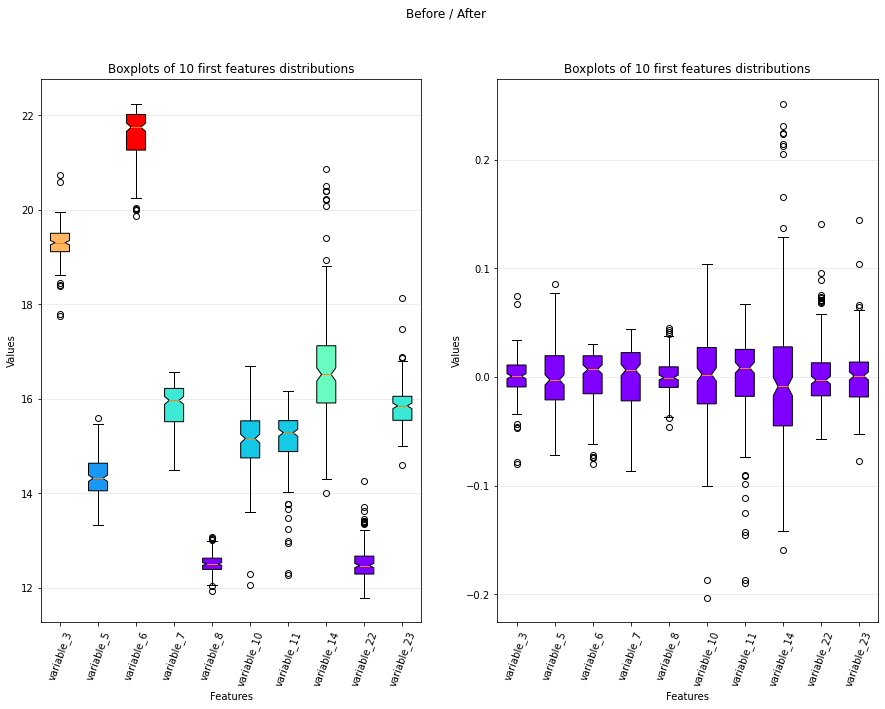

In [43]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'level_scaling', based='metabolite'))

## Robust scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
\end{eqnarray}

_Use <code>RobustScaler()</code> function from <code>scikitlearn</code> package_

In [44]:
normPeakTable(X_KNN, 'robust_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,1.175611,0.542886,0.580025,0.635545,0.466016,0.538265,0.915837,0.812829,0.844607,1.877818,...,-1.672480,0.400944,0.354850,0.620086,0.071006,0.070292,0.663717,0.220800,0.992846,0.687717
1,1.107530,1.498139,-1.215044,-1.298321,0.139136,-0.016752,-1.905796,1.186676,0.480263,0.110992,...,0.815313,1.760363,1.210978,0.229199,1.169139,0.481705,-0.194684,-0.300736,0.895440,-0.353116
2,-0.482908,1.932139,0.536310,0.629985,-0.269847,-0.675524,0.053106,0.733431,0.827533,0.188644,...,-0.323359,-0.642428,0.348548,0.767804,-0.303145,-0.568134,0.614790,-0.450941,0.642566,0.579962
3,0.186961,1.955802,0.558559,0.620242,0.911609,0.993018,1.047710,-0.560731,0.193629,1.023040,...,0.003054,-0.071940,0.174883,0.729168,-0.145090,-2.270718,0.677393,0.093379,0.869212,0.615593
4,0.646888,0.336785,0.533187,0.575175,-0.804329,-0.265730,0.019697,0.077546,-0.679228,0.630575,...,-0.029007,-0.528013,0.408067,0.732959,0.383770,-0.794824,0.593469,-0.539673,0.755016,0.644952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.926959,0.220834,-1.245414,-1.334351,0.606005,-0.448429,-1.584543,0.503833,-1.030276,-0.910938,...,-0.909148,-3.615600,0.348524,-0.098575,0.068907,-0.856934,-0.377123,0.546304,-0.044908,-0.372012
182,-0.005477,0.892575,-0.878662,-0.917085,0.025275,-0.855023,-0.181536,0.247943,-0.051127,1.226200,...,0.529862,0.678481,-0.423631,-0.722677,1.492892,1.672844,-1.259707,1.214827,-0.056584,-1.006516
183,-0.342795,-0.046688,-0.485310,-1.092938,-0.021603,-0.922859,-1.163401,-0.165381,0.885476,-0.468416,...,0.368154,2.948954,-0.181496,0.012744,-0.080194,-0.034056,-1.146194,-0.123033,-0.000065,-0.632725
184,-1.116232,0.208358,-1.042624,-1.614272,-0.811421,-1.332106,-2.300437,-0.335242,0.514311,0.334643,...,-0.579057,-2.541731,0.209975,-0.270478,-1.845713,-0.671017,-0.318369,-0.383757,-0.133830,-0.372417


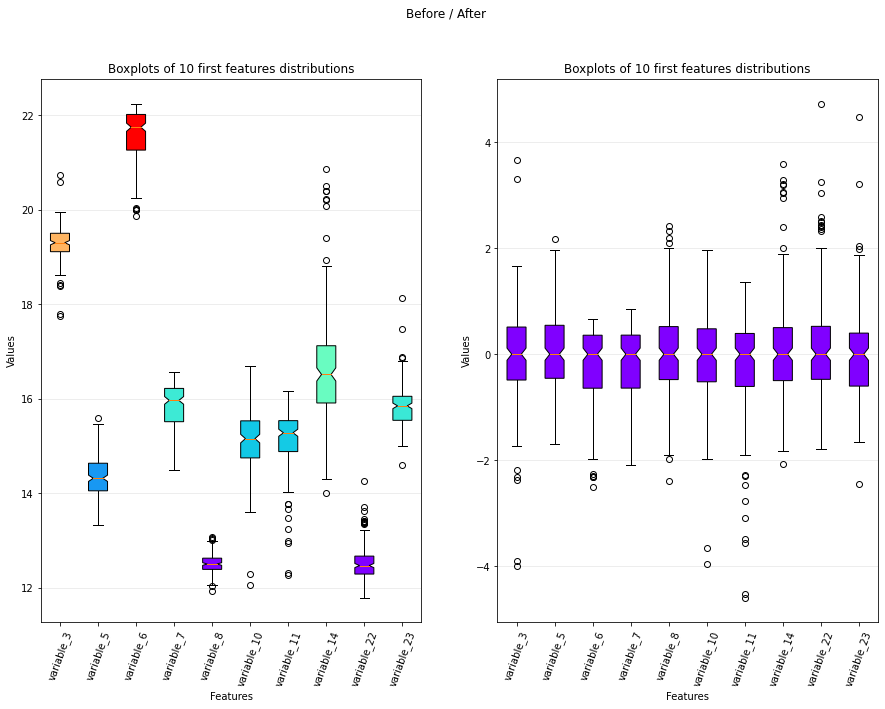

In [45]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'robust_scaling', based='metabolite'))

## Autoscaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
\end{eqnarray}

_Use <code>StandardScaler()</code> function from <code>scikitlearn</code> package_

In [46]:
normPeakTable(X_KNN, 'autoscaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,1.295652,0.632625,1.136937,1.260529,0.533640,0.701332,1.124375,0.714599,0.729366,2.321801,...,-2.057983,0.392160,0.297337,1.028495,0.085059,0.115149,1.280142,0.293211,1.355033,1.272562
1,1.222709,1.895054,-1.478628,-1.861504,0.135872,0.033090,-1.727986,1.100300,0.374372,0.170951,...,0.957650,1.731619,1.247767,0.414696,1.482863,0.557092,-0.148107,-0.335641,1.225214,-0.409034
2,-0.481291,2.468614,1.073241,1.251554,-0.361803,-0.760072,0.252249,0.632683,0.712730,0.265481,...,-0.422616,-0.635894,0.290342,1.260452,-0.391195,-0.570654,1.198734,-0.516754,0.888195,1.098471
3,0.236408,2.499886,1.105659,1.235824,1.075866,1.248856,1.257684,-0.702515,0.095094,1.281236,...,-0.026948,-0.073781,0.097547,1.199783,-0.190007,-2.399583,1.302896,0.139570,1.190259,1.156037
4,0.729176,0.360248,1.068691,1.163067,-1.012194,-0.266679,0.218476,-0.043998,-0.755364,0.803467,...,-0.065811,-0.523159,0.356417,1.205735,0.483173,-0.814166,1.163260,-0.623743,1.038064,1.203471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.029246,0.207012,-1.522879,-1.919671,0.703987,-0.486649,-1.403234,0.395805,-1.097402,-1.073098,...,-1.132693,-3.565413,0.290315,-0.099998,0.082388,-0.880885,-0.451659,0.685693,-0.028041,-0.439562
182,0.030230,1.094762,-0.988490,-1.246036,-0.002681,-0.976190,0.015051,0.131801,-0.143381,1.528553,...,0.611634,0.665621,-0.566891,-1.080006,1.894965,1.836623,-1.920144,1.491778,-0.043603,-1.464682
183,-0.331174,-0.146536,-0.415344,-1.529933,-0.059725,-1.057864,-0.977506,-0.294629,0.769185,-0.534393,...,0.415616,2.902760,-0.298086,0.074804,-0.107402,0.003058,-1.731276,-0.121372,0.031724,-0.860776
184,-1.159837,0.190524,-1.227397,-2.371575,-1.020824,-1.550599,-2.126925,-0.469875,0.407546,0.443213,...,-0.732567,-2.507311,0.136505,-0.369932,-2.354715,-0.681171,-0.353901,-0.435745,-0.146552,-0.440216


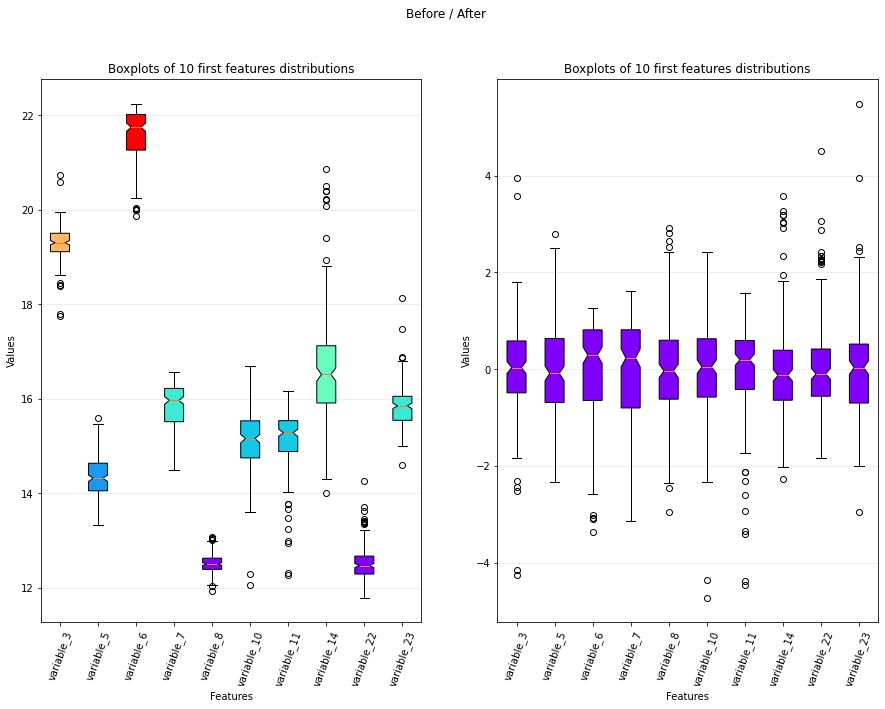

In [47]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'autoscaling', based='metabolite'))

## Pareto scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
\end{eqnarray}

In [48]:
normPeakTable(X_KNN, 'pareto_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.781034,0.420426,0.818069,0.832638,0.235527,0.565968,0.904726,0.774335,0.455406,1.500139,...,-1.166045,0.203304,0.216623,0.673352,0.042894,0.051804,1.035541,0.141731,0.789980,0.984184
1,0.737064,1.259404,-1.063928,-1.229610,0.059968,0.026704,-1.390420,1.192279,0.233753,0.110453,...,0.542601,0.897710,0.909054,0.271500,0.747781,0.250628,-0.119808,-0.162241,0.714296,-0.316342
2,-0.290128,1.640577,0.772237,0.826709,-0.159685,-0.613370,0.202972,0.685572,0.445019,0.171530,...,-0.239453,-0.329661,0.211527,0.825213,-0.197273,-0.256729,0.969688,-0.249787,0.517815,0.849544
3,0.142510,1.661359,0.795564,0.816319,0.474842,1.007814,1.011993,-0.761241,0.059375,0.827819,...,-0.015268,-0.038250,0.071068,0.785494,-0.095817,-1.079539,1.053948,0.067465,0.693918,0.894064
4,0.439556,0.239412,0.768964,0.768260,-0.446740,-0.215207,0.175796,-0.047676,-0.471639,0.519128,...,-0.037288,-0.271217,0.259665,0.789390,0.243656,-0.366282,0.940992,-0.301503,0.605188,0.930749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.620441,0.137575,-1.095769,-1.268032,0.310711,-0.392721,-1.129109,0.428892,-0.685204,-0.693339,...,-0.641780,-1.848389,0.211507,-0.065468,0.041547,-0.396298,-0.365359,0.331448,-0.016348,-0.339952
182,0.018223,0.727550,-0.711256,-0.823065,-0.001183,-0.787775,0.012111,0.142819,-0.089525,0.987613,...,0.346549,0.345073,-0.413005,-0.707076,0.955597,0.826271,-1.553257,0.721090,-0.025420,-1.132767
183,-0.199636,-0.097384,-0.298856,-1.010592,-0.026360,-0.853685,-0.786548,-0.319258,0.480269,-0.345276,...,0.235486,1.504855,-0.217169,0.048974,-0.054161,0.001376,-1.400476,-0.058668,0.018495,-0.665713
184,-0.699163,0.126617,-0.883158,-1.566536,-0.450549,-1.251317,-1.711425,-0.509154,0.254466,0.286364,...,-0.415070,-1.299845,0.099450,-0.242193,-1.187441,-0.306449,-0.286280,-0.210629,-0.085440,-0.340457


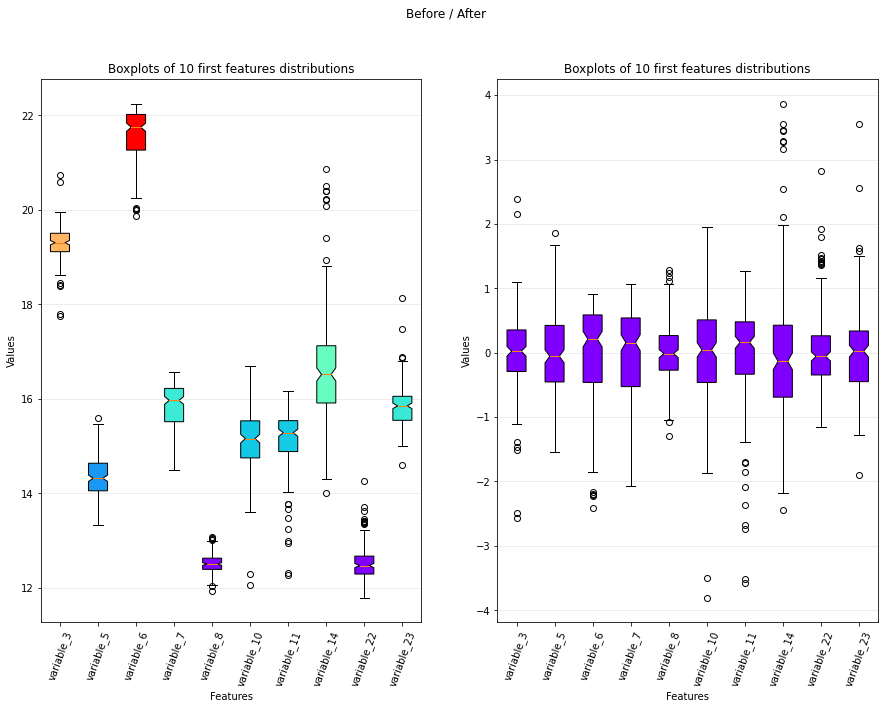

In [49]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'pareto_scaling', based='metabolite'))

## Vast scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
\end{eqnarray}

In [50]:
normPeakTable(X_KNN, 'vast_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,68.782701,20.563915,47.426593,45.833093,34.273962,16.287377,26.315487,10.140331,23.401523,88.077944,...,-81.496656,18.185584,7.302130,30.689513,4.089699,6.878872,26.276432,15.418356,50.447076,27.916693
1,64.910347,61.600107,-61.679968,-67.684677,8.726628,0.768476,-40.442720,15.613520,12.011644,6.485050,...,37.923179,80.300238,30.643172,12.374216,71.297114,33.280122,-3.040068,-17.649517,45.613987,-8.973133
2,-25.550457,80.244073,44.769531,45.506756,-23.237449,-17.651514,5.903775,8.977926,22.867772,10.071060,...,-16.735698,-29.488252,7.130325,37.610925,-18.808932,-34.090263,24.605443,-27.173214,33.066963,24.097594
3,12.550287,81.260595,46.121848,44.934813,69.099356,29.002779,29.435518,-9.968853,3.051061,48.603908,...,-1.067132,-3.421455,2.395608,35.800629,-9.135688,-143.348611,26.743496,7.339228,44.312651,25.360429
4,38.709977,11.710127,44.579743,42.289374,-65.009901,-6.193218,5.113326,-0.624348,-24.235666,30.479662,...,-2.606144,-24.260410,8.753030,35.978231,23.231315,-48.637438,23.877295,-32.799203,38.646488,26.401007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,54.639879,6.729082,-63.525896,-69.799632,45.214795,-11.301682,-32.842053,5.616572,-35.209899,-40.708171,...,-44.854957,-165.338614,7.129677,-2.983850,3.961256,-52.623140,-9.270832,36.056799,-1.043945,-9.642839
182,1.604846,35.586033,-41.234199,-45.306127,-0.172185,-22.670521,0.352264,1.870287,-4.600354,57.985929,...,24.220855,30.866805,-13.921942,-32.226558,91.111273,109.717985,-39.413253,78.444331,-1.623304,-32.131302
183,-17.581147,-4.763262,-17.325819,-55.628669,-3.835928,-24.567276,-22.878068,-4.180849,24.679131,-20.272283,...,16.458496,134.609421,-7.320508,2.232086,-5.163946,0.182656,-35.536510,-6.382267,1.181051,-18.883180
184,-61.572618,6.193125,-51.200038,-86.230968,-65.564185,-36.010286,-49.779695,-6.667642,13.076016,16.813366,...,-29.009829,-116.271331,3.352356,-11.038483,-113.216406,-40.692448,-7.264231,-22.913423,-5.456061,-9.657186


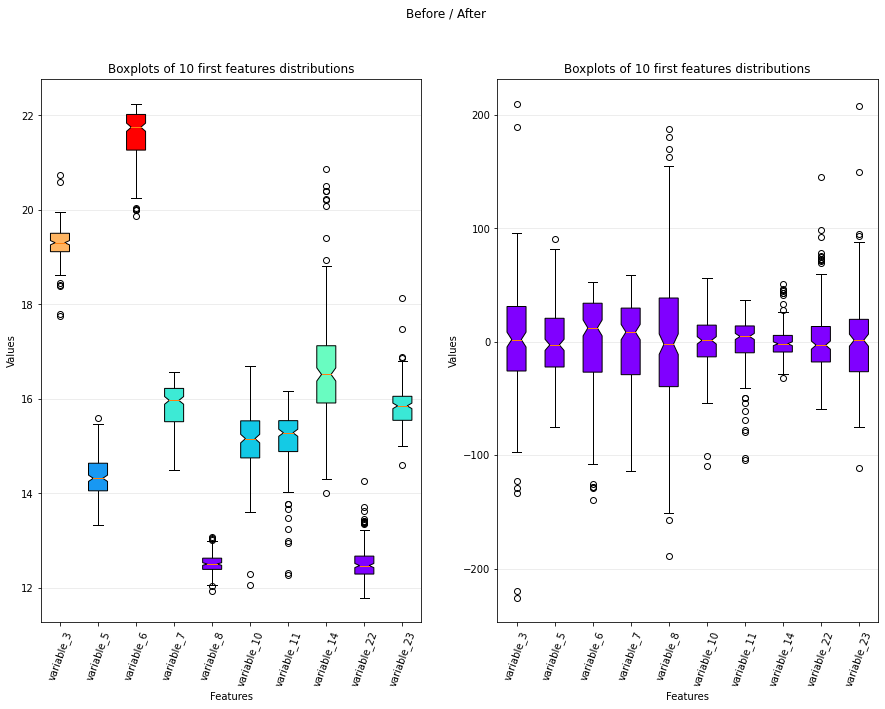

In [51]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'vast_scaling', based='metabolite'))

# Sample-based Normalisation Methods

At this point, we want to normalise our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{i=1}^p x_{ni} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

## Mean normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - \bar{x}_i
\end{eqnarray}

In [52]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.515504,-0.610448,6.939301,1.168462,-2.631138,0.334323,0.635156,2.254617,-2.453389,1.559323,...,-3.194029,-2.677634,-2.053433,-2.015529,-2.997691,-3.131953,-0.977023,-2.891264,-2.131992,-1.363755
1,4.636720,0.094837,5.732855,-0.046026,-2.560900,0.046864,-1.063906,2.855220,-2.444064,0.809155,...,-2.078194,-2.169917,-1.401245,-2.130898,-2.494507,-2.894782,-1.763894,-2.890475,-2.028394,-2.221843
2,4.028949,0.359587,7.065477,1.323700,-2.646414,-0.458237,0.229645,2.317588,-2.300720,0.860049,...,-2.509870,-2.794781,-1.897992,-1.756952,-2.959649,-3.111603,-0.871139,-2.921360,-2.131510,-1.308729
3,4.173778,0.257428,6.966291,1.200866,-2.482330,0.734071,0.764651,0.633859,-2.657482,1.168114,...,-2.498819,-2.759677,-2.116293,-1.898927,-3.024457,-3.597745,-0.918950,-2.883979,-2.144813,-1.390269
4,4.652199,-0.388203,7.246510,1.468480,-2.589719,0.046465,0.391167,1.706433,-2.689681,1.268024,...,-2.211937,-2.581094,-1.679532,-1.597017,-2.553908,-2.977501,-0.710963,-2.762970,-1.897183,-1.062538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.812077,-0.405043,5.955602,0.174252,-2.204575,-0.045949,-0.607985,2.273677,-2.772191,0.535475,...,-2.503602,-3.347897,-1.663780,-2.105852,-2.604991,-2.940167,-1.716869,-2.406179,-2.208699,-1.994444
182,4.352583,-0.109430,6.135805,0.371704,-2.438701,-0.461223,0.213826,1.867220,-2.496726,1.525085,...,-2.040087,-2.307227,-2.215234,-2.622379,-2.240521,-2.486620,-2.774261,-2.314305,-2.310457,-2.704067
183,4.385728,-0.493188,6.597014,0.412306,-2.285341,-0.349940,-0.264340,1.530989,-1.976482,0.828364,...,-1.938543,-1.541499,-1.908087,-1.962924,-2.585251,-2.693257,-2.486200,-2.526749,-2.120383,-2.178382
184,4.094363,-0.334566,6.186343,0.054836,-2.462804,-0.661068,-0.998784,1.334975,-2.107714,1.246230,...,-2.297389,-2.985760,-1.667659,-2.143794,-3.146988,-2.821987,-1.575140,-2.590447,-2.171220,-1.917076


In [53]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples').mean(axis=1).round()

0      0.0
1      0.0
2      0.0
3     -0.0
4     -0.0
      ... 
181    0.0
182    0.0
183   -0.0
184   -0.0
185    0.0
Length: 186, dtype: float64

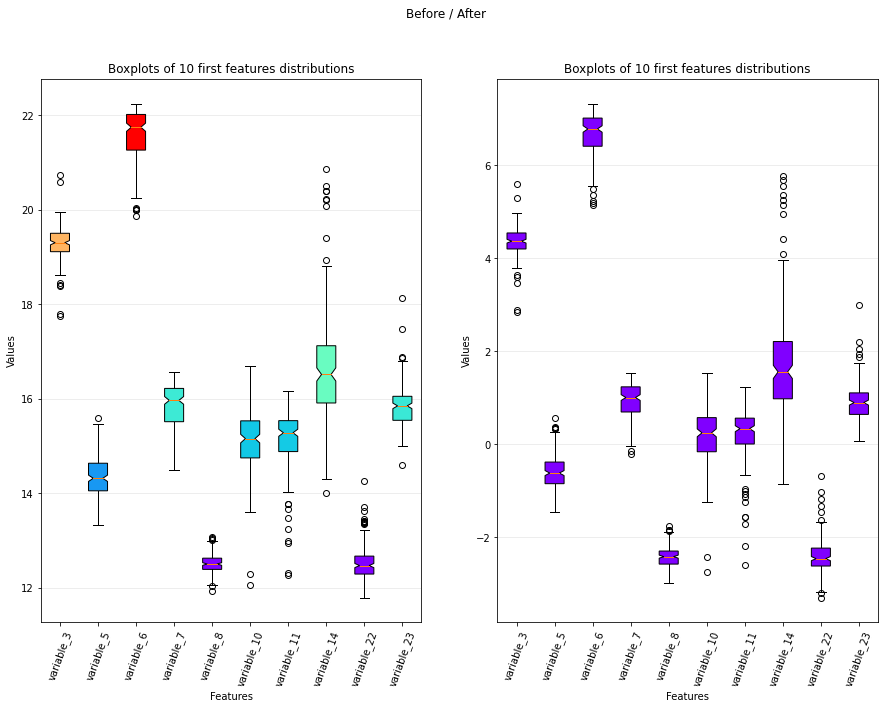

In [54]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'mean_normalisation', based='samples'))

## Median normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
\end{eqnarray}

In [55]:
normPeakTable(X_KNN, 'median_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,5.179176,0.053224,7.602973,1.832134,-1.967466,0.997994,1.298828,2.918289,-1.789717,2.222994,...,-2.530357,-2.013962,-1.389761,-1.351857,-2.334020,-2.468281,-0.313351,-2.227592,-1.468320,-0.700083
1,5.275144,0.733262,6.371279,0.592398,-1.922476,0.685288,-0.425481,3.493645,-1.805640,1.447579,...,-1.439770,-1.531492,-0.762820,-1.492474,-1.856083,-2.256358,-1.125469,-2.252051,-1.389969,-1.583418
2,4.629706,0.960344,7.666234,1.924458,-2.045656,0.142520,0.830402,2.918345,-1.699963,1.460806,...,-1.909113,-2.194024,-1.297235,-1.156195,-2.358892,-2.510846,-0.270382,-2.320603,-1.530752,-0.707972
3,4.757455,0.841105,7.549968,1.784544,-1.898653,1.317749,1.348329,1.217537,-2.073804,1.751791,...,-1.915142,-2.176000,-1.532616,-1.315249,-2.440780,-3.014067,-0.335272,-2.300301,-1.561135,-0.806591
4,5.277469,0.237067,7.871780,2.093750,-1.964450,0.671734,1.016437,2.331702,-2.064412,1.893294,...,-1.586667,-1.955824,-1.054263,-0.971747,-1.928639,-2.352232,-0.085694,-2.137701,-1.271913,-0.437268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,5.576593,0.359473,6.720118,0.938768,-1.440059,0.718567,0.156531,3.038193,-2.007675,1.299990,...,-1.739086,-2.583381,-0.899264,-1.341336,-1.840475,-2.175652,-0.952353,-1.641663,-1.444183,-1.229929
182,4.978439,0.516426,6.761660,0.997560,-1.812845,0.164633,0.839682,2.493076,-1.870870,2.150941,...,-1.414232,-1.681371,-1.589379,-1.996524,-1.614665,-1.860764,-2.148405,-1.688449,-1.684602,-2.078211
183,5.100690,0.221774,7.311976,1.127269,-1.570379,0.365022,0.450622,2.245951,-1.261519,1.543327,...,-1.223581,-0.826536,-1.193124,-1.247962,-1.870289,-1.978295,-1.771238,-1.811787,-1.405421,-1.463420
184,4.883327,0.454398,6.975307,0.843800,-1.673840,0.127896,-0.209820,2.123939,-1.318750,2.035194,...,-1.508425,-2.196796,-0.878695,-1.354830,-2.358024,-2.033023,-0.786176,-1.801483,-1.382256,-1.128112


In [56]:
normPeakTable(X_KNN, 'median_normalisation', based='samples').median(axis=1)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
Length: 186, dtype: float64

In [57]:
row_medians = np.median(X_KNN, axis=1)
row_medians = np.array(row_medians).reshape((row_medians.shape[0], 1))
print('Median :\n', (X_KNN - row_medians).median(axis=1), '\n')
print('Mean :\n', (X_KNN - row_medians).mean(axis=1), '\n')

Median :
 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
Length: 186, dtype: float64 

Mean :
 0      0.663672
1      0.638424
2      0.600757
3      0.583677
4      0.625270
         ...   
181    0.764516
182    0.625856
183    0.714962
184    0.788964
185    0.773160
Length: 186, dtype: float64 



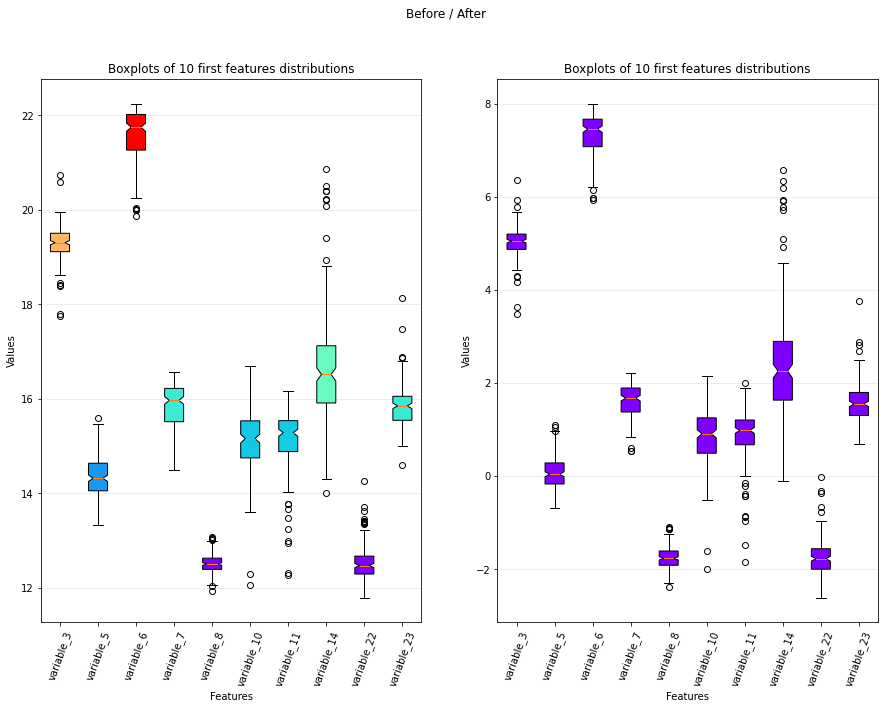

In [58]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'median_normalisation', based='samples'))

## L1 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
     \sum_{i=1}^p x_{ni} = 1
\end{eqnarray}

In [59]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.002327,0.001723,0.002612,0.001933,0.001486,0.001835,0.001870,0.002061,0.001506,0.001979,...,0.001419,0.001480,0.001554,0.001558,0.001442,0.001427,0.001680,0.001455,0.001544,0.001635
1,0.002347,0.001807,0.002477,0.001790,0.001491,0.001801,0.001669,0.002135,0.001505,0.001892,...,0.001548,0.001537,0.001629,0.001542,0.001499,0.001451,0.001586,0.001452,0.001554,0.001531
2,0.002275,0.001838,0.002636,0.001953,0.001480,0.001741,0.001823,0.002071,0.001522,0.001898,...,0.001497,0.001463,0.001569,0.001586,0.001443,0.001425,0.001692,0.001448,0.001542,0.001640
3,0.002288,0.001826,0.002618,0.001937,0.001502,0.001882,0.001886,0.001870,0.001482,0.001933,...,0.001500,0.001469,0.001545,0.001571,0.001438,0.001370,0.001687,0.001455,0.001542,0.001631
4,0.002356,0.001749,0.002668,0.001972,0.001483,0.001801,0.001842,0.002001,0.001471,0.001948,...,0.001529,0.001484,0.001593,0.001603,0.001488,0.001437,0.001710,0.001462,0.001567,0.001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.002377,0.001746,0.002515,0.001816,0.001529,0.001790,0.001722,0.002070,0.001460,0.001860,...,0.001493,0.001391,0.001594,0.001541,0.001480,0.001440,0.001588,0.001504,0.001528,0.001554
182,0.002318,0.001782,0.002532,0.001840,0.001502,0.001740,0.001821,0.002020,0.001495,0.001978,...,0.001550,0.001518,0.001529,0.001480,0.001526,0.001497,0.001462,0.001517,0.001518,0.001471
183,0.002328,0.001735,0.002596,0.001845,0.001518,0.001753,0.001763,0.001981,0.001555,0.001896,...,0.001560,0.001608,0.001564,0.001557,0.001481,0.001468,0.001493,0.001489,0.001538,0.001531
184,0.002293,0.001755,0.002547,0.001802,0.001496,0.001715,0.001674,0.001958,0.001539,0.001947,...,0.001516,0.001433,0.001593,0.001535,0.001413,0.001452,0.001604,0.001481,0.001532,0.001562


In [60]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples').sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
181    1.0
182    1.0
183    1.0
184    1.0
185    1.0
Length: 186, dtype: float64

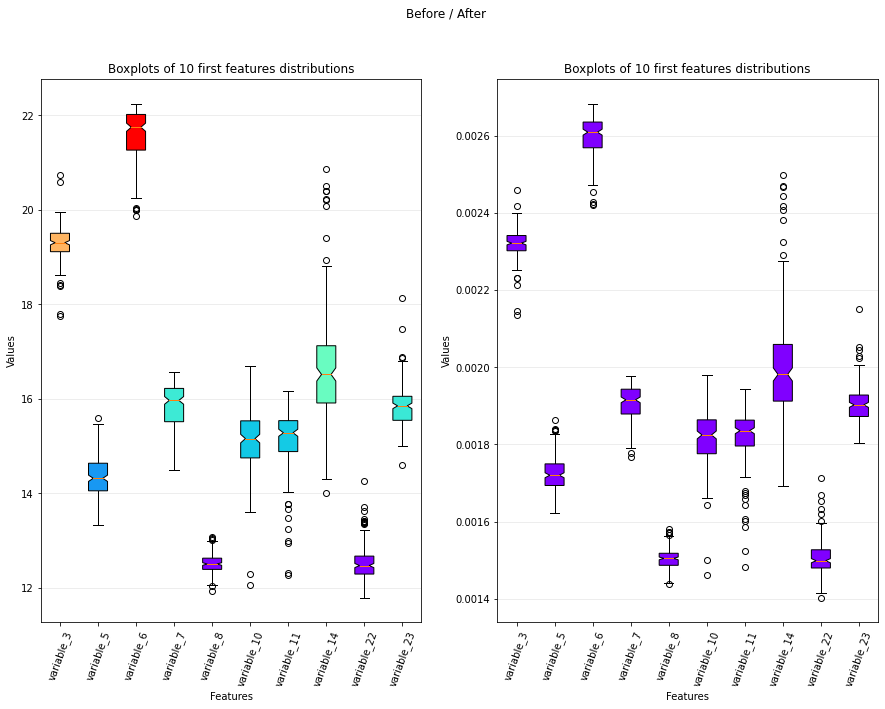

In [61]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l1_normalisation', based='samples'))

## L2 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
    \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
\end{eqnarray}

In [62]:
normPeakTable(X_KNN, 'l2_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.054218,0.040154,0.060867,0.045035,0.034610,0.042746,0.043572,0.048015,0.035098,0.046107,...,0.033066,0.034483,0.036195,0.036299,0.033605,0.033236,0.039149,0.033897,0.035980,0.038088
1,0.054657,0.042078,0.057692,0.041688,0.034723,0.041945,0.038869,0.049723,0.035046,0.044056,...,0.036060,0.035806,0.037934,0.035914,0.034907,0.033798,0.036930,0.033810,0.036198,0.035662
2,0.052999,0.042825,0.061417,0.045498,0.034491,0.040558,0.042465,0.048254,0.035450,0.044213,...,0.034870,0.034080,0.036566,0.036957,0.033623,0.033202,0.039413,0.033729,0.035919,0.038200
3,0.053323,0.042546,0.061008,0.045142,0.035006,0.043858,0.043942,0.043582,0.034524,0.045052,...,0.034961,0.034243,0.036014,0.036612,0.033514,0.031937,0.039309,0.033901,0.035935,0.038012
4,0.054921,0.040765,0.062207,0.045980,0.034583,0.041986,0.042954,0.046648,0.034302,0.045417,...,0.035644,0.034607,0.037139,0.037371,0.034683,0.033494,0.039859,0.034096,0.036528,0.038872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.055334,0.040654,0.058551,0.042284,0.035590,0.041664,0.040083,0.048191,0.033993,0.043300,...,0.034749,0.032373,0.037112,0.035868,0.034463,0.033520,0.036962,0.035023,0.035579,0.036181
182,0.053995,0.041513,0.058983,0.042859,0.034997,0.040529,0.042417,0.047042,0.034835,0.046085,...,0.036112,0.035365,0.035622,0.034483,0.035551,0.034863,0.034058,0.035345,0.035356,0.034255
183,0.054220,0.040421,0.060474,0.042982,0.035352,0.040826,0.041068,0.046146,0.036226,0.044159,...,0.036333,0.037456,0.036419,0.036264,0.034504,0.034199,0.034784,0.034670,0.035819,0.035655
184,0.053372,0.040845,0.059289,0.041946,0.034825,0.039921,0.038966,0.045567,0.035829,0.045316,...,0.035293,0.033346,0.037074,0.035727,0.032890,0.033809,0.037336,0.034464,0.035650,0.036369


In [63]:
np.sqrt((normPeakTable(X_KNN, 'l2_normalisation', based='samples') * normPeakTable(X_KNN, 'l2_normalisation', based='samples')).sum(axis=1))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
181    1.0
182    1.0
183    1.0
184    1.0
185    1.0
Length: 186, dtype: float64

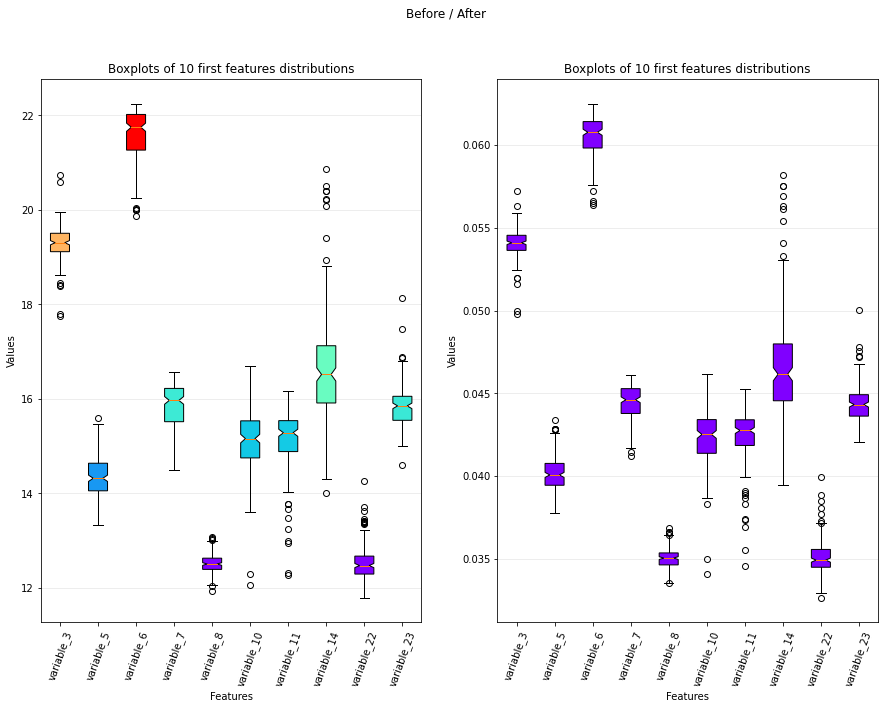

In [64]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l2_normalisation', based='samples'))